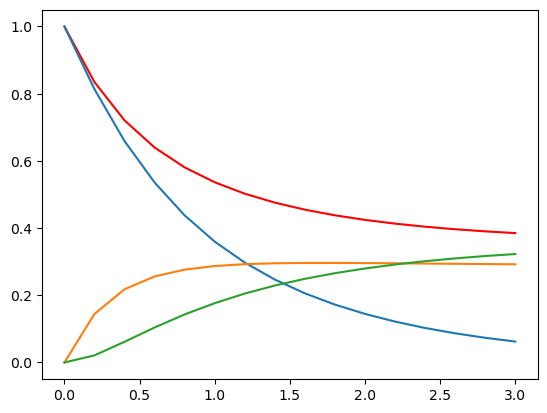

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
k1 = 1
k2 = 1.5
tf = 3
dt = .2
t = np.arange(0, tf+.01, dt)

def dC(C, tm):
    # noinspection PyShadowingNames
    Ca, Cb, Cc, Cd = C
    d1 = -k1*Ca*Cb
    d2 = -k1*Ca*Cb-k2*Cb*Cc
    d3 = k1*Ca*Cb-k2*Cb*Cc
    d4 = k2*Cb*Cc
    return [d1, d2, d3, d4]


c0 = [1,1,0,0]
Cf = odeint(dC, c0, t)
Ca = Cf[:,0]
Cb = Cf[:,1]
Cc = Cf[:,2]
Cd = Cf[:,3]

selectivity = np.ones(len(t))
selectivity = Cc[1:]/(Cc[1:]+Cd[1:])


plt.subplots()
plt.plot(t, Ca, 'r-', label='Ca')
plt.plot(t, Cb)
plt.plot(t, Cc)
plt.plot(t, Cd)


In [8]:
from scipy.integrate import solve_ivp

def deriv(t, Y):
    x, y, z = Y
    xdot = -.04*x+10**4*x*y
    ydot = .04*x-10**4*y*z-3*10**7*y**2
    zdot = 3*10**7*y**2
    return [xdot, ydot, zdot]



In [10]:
mu = .2

def fun(t, Y):
    x, v = Y
    xdot = v
    vdot = mu+(1-x**2)*v-x
    return [xdot, vdot]

tspan = 0,40
Y0 = [1, 0]
sol = solve_ivp(fun, tspan, Y0)
print(sol.y[1])

[ 0.00000000e+00 -9.99000740e-04 -1.09886711e-02 -1.10593077e-01
 -6.49502761e-01 -1.51193243e+00 -1.64589274e+00 -4.03163088e-01
  4.32424791e-01  9.82910970e-01  2.34458880e+00  2.82209027e+00
  2.55374164e+00  7.78567243e-01 -1.28399898e-01 -3.98743331e-01
 -5.27008946e-01 -6.61995755e-01 -9.83948666e-01 -1.58466415e+00
 -2.38187793e+00 -1.51009998e+00 -1.15959413e-01  4.18641921e-01
  6.90616345e-01  1.05579979e+00  2.08079066e+00  2.91529330e+00
  1.03498682e+00 -3.47681612e-02 -3.34441673e-01 -4.71086252e-01
 -5.82638766e-01 -7.45445335e-01 -1.70089106e+00 -2.34114131e+00
 -1.77759193e+00 -3.65407389e-01  2.99331731e-01  6.14927088e-01
  9.13655990e-01  1.98753967e+00  2.75282187e+00  2.67005060e+00
  1.05717514e+00 -1.54565759e-02 -3.07113604e-01 -4.49611602e-01
 -5.70650507e-01 -7.24119755e-01 -1.38639542e+00 -2.08079816e+00
 -2.23247076e+00 -1.02009520e+00  3.05506564e-02  5.03712228e-01
  7.65141412e-01  1.25996570e+00  1.81985663e+00  2.64767722e+00
  2.51671929e+00  8.93419